# Tentative de Mel-SPectrograms

In [89]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torchaudio.transforms as ta
import torchaudio.functional as tf
import torchaudio
from IPython.display import display, Audio

comment bien choisir n_mels ?????

In [64]:
class AudioTransform(torch.nn.Module):
    def __init__(self,input_freq = 16000, n_fft=1024,n_mel=128,stretch_factor=0.8):
        super().__init__()
        #self.resample = Resample(orig_freq=input_freq, new_freq=resample_freq)
        # nécessaire de resample ici ? 
        self.spec = ta.Spectrogram(n_fft=n_fft, power=2)

        self.spec_aug = torch.nn.Sequential(
            ta.TimeStretch(stretch_factor, fixed_rate=True),
            ta.FrequencyMasking(freq_mask_param=80),
            ta.TimeMasking(time_mask_param=80),
        )

        self.mel_scale = ta.MelScale(
            n_mels=n_mel, sample_rate=input_freq, n_stft=n_fft // 2 + 1)
        
        self.inverse_melscale = ta.InverseMelScale(sample_rate=input_freq, n_stft=n_fft // 2 + 1,n_mels=n_mel)
        
        self.griffin = ta.GriffinLim(n_fft=n_fft)
        
        #self.mel_spec = ta.MelSpectrogram(sample_rate = input_freq,n_fft=n_fft,n_mels=64)
        
    def forward(self, wav: torch.Tensor): #-> torch.Tensor:
        #Resample the input
        #resampled = self.resample(waveform)

        # Convert to power spectrogram
        spec = self.spec(wav)

        # Apply SpecAugment
        #spec = self.spec_aug(spec)

        # Convert to mel-scale
        mel = self.mel_scale(spec)

        #mel = self.mel_spec(wav)

        return mel
    
    def inverse(self,mel : torch.Tensor):
        inv = self.inverse_melscale(mel)
        inv = self.griffin(inv)
        
        return inv
        

<ipython-input-94-d41f0f90fae9>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  wav = torch.tensor(torch.tensor(wav[0][11000:11000+sec]))


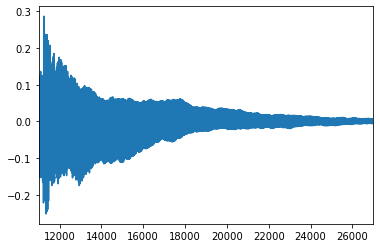

In [94]:
#fe, wav = wave.read('sine440.wav')
#print(fe)

#wav, sample_rate = torchaudio.load('sine440.wav')
wav, sample_rate = torchaudio.load('piano.wav')

resample_rate = 16000

wav = tf.resample(orig_freq = sample_rate, new_freq = resample_rate, waveform = wav)

sec = int(resample_rate)

plt.plot(wav[0].numpy())
plt.xlim(11000,11000+sec)


wav = torch.tensor(torch.tensor(wav[0][11000:11000+sec]))

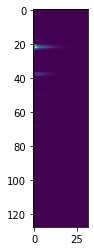

In [95]:
AT = AudioTransform()

spec = AT.forward(wav)

plt.imshow(abs(spec))

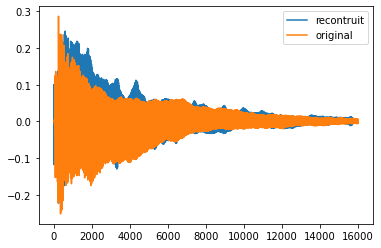

In [96]:
inv = AT.inverse(spec)

plt.plot(inv.numpy(),label='recontruit')
plt.plot(wav.numpy(),label='original')
plt.legend()

In [97]:
display(Audio(wav.numpy(),rate = resample_rate))
display(Audio(inv.numpy(),rate = resample_rate))

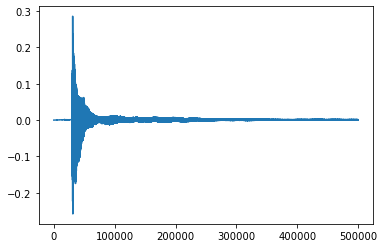

In [47]:
waveform, sample_rate = torchaudio.load("piano.wav", normalize=True)

In [77]:

mel_spectrogram_transform = ta.MelSpectrogram(16000, n_fft=1024)


In [78]:

mel_spectrogram = mel_spectrogram_transform(wav)


In [79]:

inverse_melscale_transform = ta.InverseMelScale(n_stft=1024 // 2 + 1)


In [80]:
spectrogram = inverse_melscale_transform(mel_spectrogram)

In [81]:
griffin = ta.GriffinLim(n_fft=1024)
inv = griffin(spectrogram)


#inv = inverse_stft(inv)

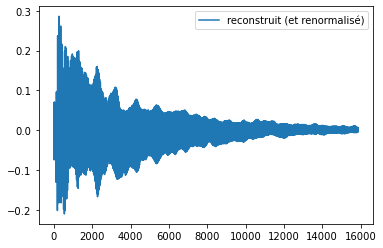

In [83]:

norm = max(inv.numpy())/max(wav.numpy())

plt.plot(inv.numpy()/norm,label='reconstruit (et renormalisé)')
plt.plot(wav.numpy(),label='original')
plt.legend()